In [ ]:
import cv2
import urllib
import numpy as np
import cvzone

# req = urllib.request.urlopen('https://media.glamour.com/photos/5a425fd3b6bcee68da9f86f8/master/pass/best-face-oil.png')
# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv2.imdecode(arr, -1) # 'Load it as it is'

img = cv2.imread('/content/face.png')		# this is read in BGR format

Girl


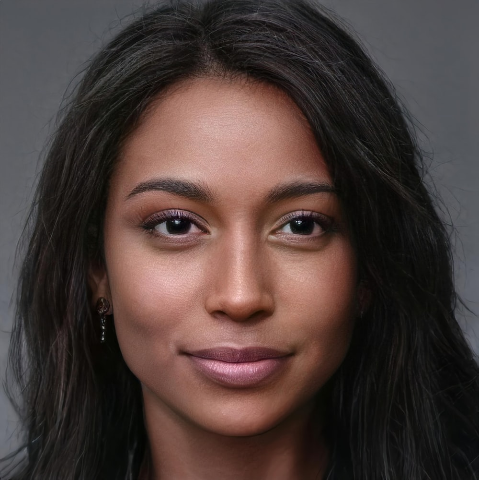

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  image = np.array(image)
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {"Girl":img}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

In [ ]:
!pip install mediapipe

In [ ]:
!pip install cvzone

In [ ]:
image.shape

(1000, 1000, 3)

Face detection model with some landmarks

WH: 1000 1000
Nose tip:
(501, 661)
Mouth center:
(505, 758)
Left ear:
(750, 498)
Right ear:
(254, 525)
xmin: 0.1801573783159256
ymin: 0.26227903366088867
width: 0.6278801560401917
height: 0.6278691291809082



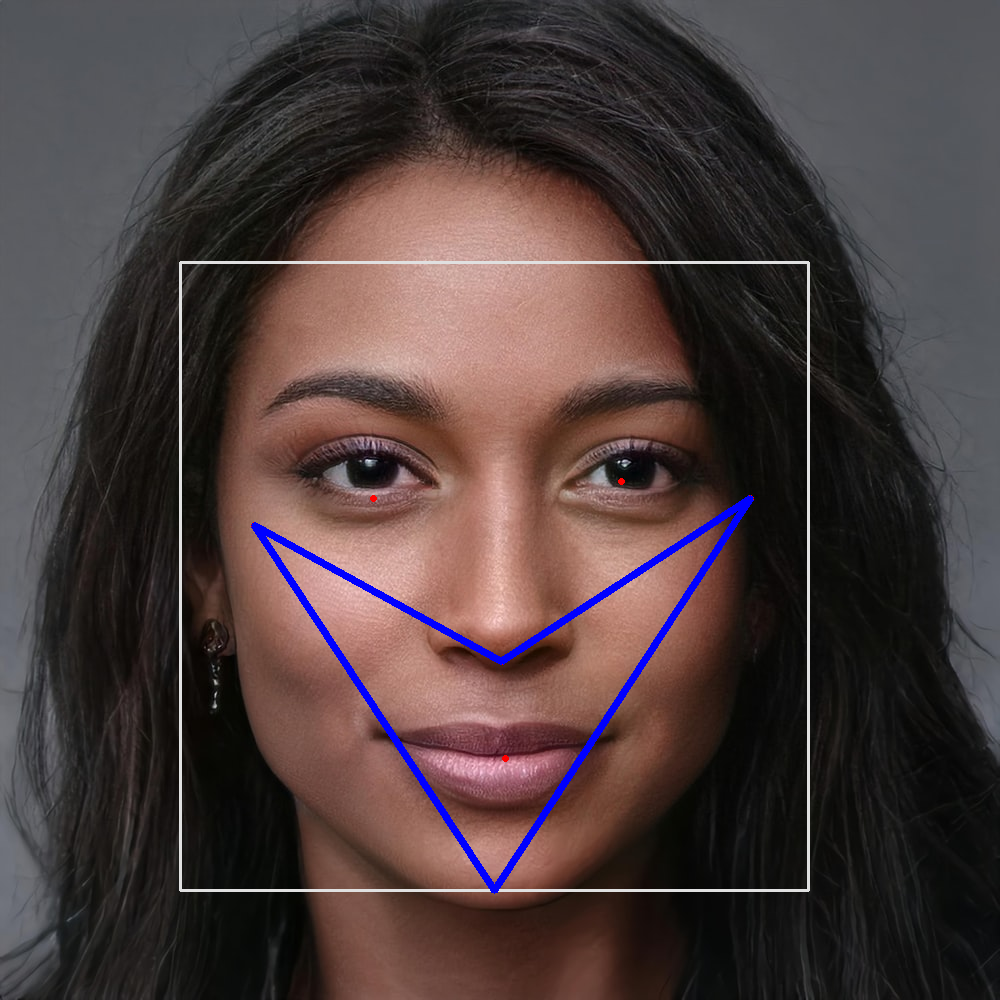

In [ ]:
import mediapipe as mp
from google.colab.patches import cv2_imshow

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:

    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    width = image.shape[1]
    height = image.shape[0]
    print("WH:", width, height)
    annotated_image = image.copy()

    for detection in results.detections:
      print('Nose tip:')
      nose_tip = (mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
      nose_coor = (int(nose_tip.x * width), int(nose_tip.y * height))
      print(nose_coor)
      
      print('Mouth center:')
      mouth_center = (mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.MOUTH_CENTER))
      mouth_coor = (int(mouth_center.x * width), int(mouth_center.y * height))
      print(mouth_coor)
      
      print('Left ear:')
      left_ear = (mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.LEFT_EAR_TRAGION))
      left_ear_coor = (int(left_ear.x * width), int(left_ear.y * height))
      print(left_ear_coor)
      
      print('Right ear:')
      right_ear = (mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.RIGHT_EAR_TRAGION))
      right_ear_coor = (int(right_ear.x * width), int(right_ear.y * height))
      print(right_ear_coor)
      
      mp_drawing.draw_detection(annotated_image, detection)
      print(detection.location_data.relative_bounding_box)
      face_bottom_y = (detection.location_data.relative_bounding_box.ymin + detection.location_data.relative_bounding_box.height)
      face_bottom_x = (detection.location_data.relative_bounding_box.xmin + detection.location_data.relative_bounding_box.width / 2)
      face_bot_coor = (int(face_bottom_x * width), int(face_bottom_y * height))

      cv2.line(annotated_image,left_ear_coor,face_bot_coor,(255,0,0),5)
      cv2.line(annotated_image,face_bot_coor,right_ear_coor,(255,0,0),5)
      cv2.line(annotated_image,right_ear_coor,nose_coor,(255,0,0),5)
      cv2.line(annotated_image,nose_coor,left_ear_coor,(255,0,0),5)
    
      cv2_imshow(annotated_image)
    #cv2.imwrite('/tmp/annotated_image' + str(0) + '.png', annotated_image)

In [ ]:
mask_width = int((left_ear_coor[0] - right_ear_coor[0])*1.15)
mask_height = int(face_bot_coor[1] - ((left_ear_coor[1] + right_ear_coor[1])/2))

print(mask_width, mask_height)

570 378


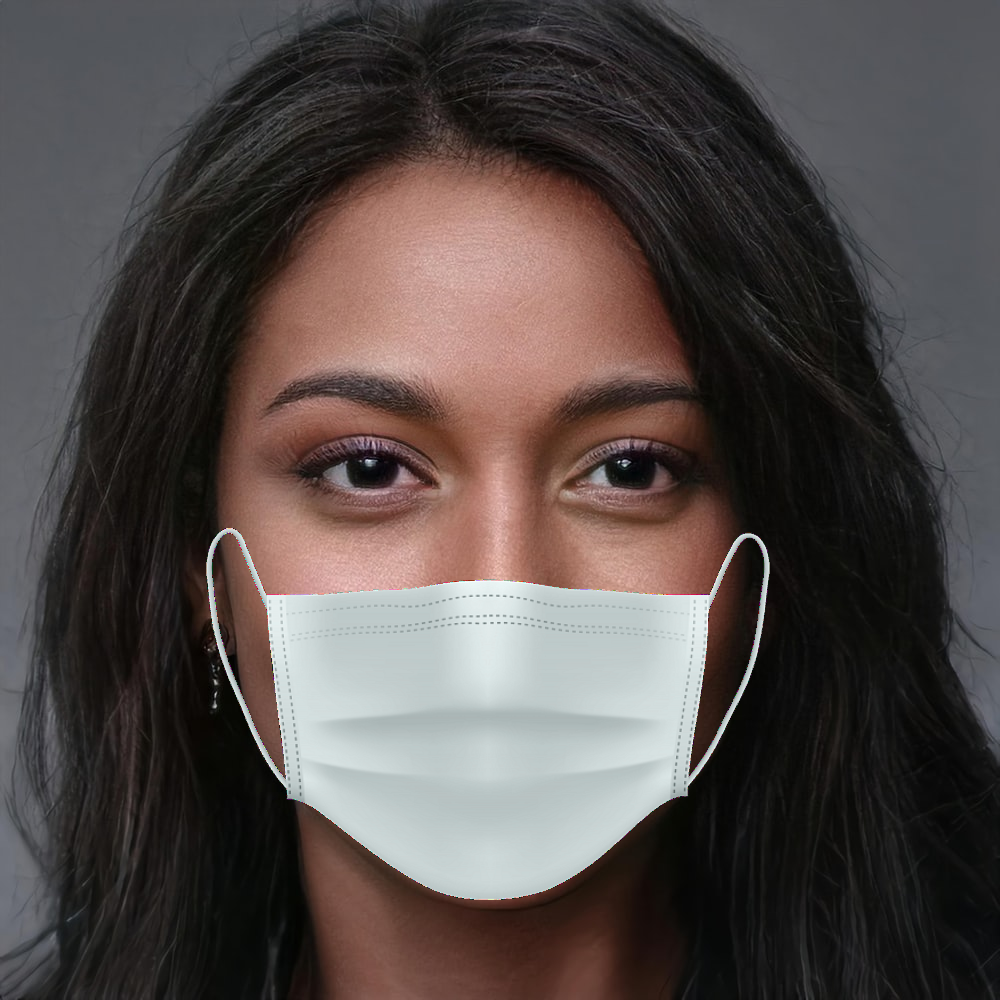

In [ ]:
np.array(annotated_image).shape

# def superimpose(org, img, ref):
#   src = org.copy()
#   print(src.shape)
#   print(img.shape)
#   print(ref)
#   img = np.array(img)[:, :, :3]
#   #src[100:200, :100] = cv2.resize(img, (100, 100))
#   src[ref[1]:ref[1]+img.shape[0], int(0.8*ref[0]):int(0.8*ref[0])+img.shape[1]] = img
#   return src

src = cv2.imread(r'/content/mask.png', cv2.IMREAD_UNCHANGED)
src = cv2.resize(src, (mask_width, mask_height))

#src = superimpose(img, src, right_ear_coor)
result = cvzone.overlayPNG(img, src, [int(right_ear_coor[0]*0.8), right_ear_coor[1]])

cv2_imshow(result)

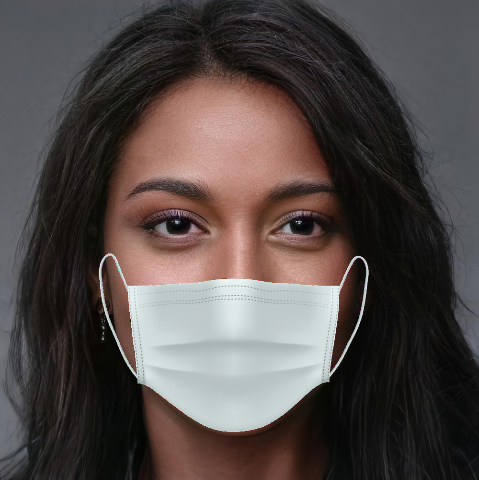

In [ ]:
resize_and_show(result)